In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.utils import get_clean_data

In [2]:
df, idx_labels = get_clean_data()

/home/max/repos/AGs-Corpus-of-News-Articles/src/utils.py:24: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(filepath)


#### Article descriptions: token length

Summary statistics token length of descriptions: 
count    473282.000000
mean         39.960660
std          17.404141
min           1.000000
25%          31.000000
50%          38.000000
75%          47.000000
max        2162.000000
Name: description_token_length, dtype: float64 

descriptions under 250 tokens: 0.9997337739444982
descriptions under 100 tokens: 0.9948635274529773 



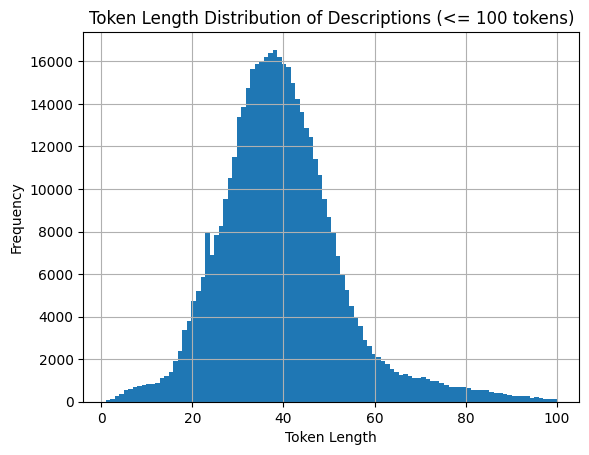

Summary statistics description token length <= 100: 
count    473282.000000
mean         39.960660
std          17.404141
min           1.000000
25%          31.000000
50%          38.000000
75%          47.000000
max        2162.000000
Name: description_token_length, dtype: float64 



In [4]:
print(f"Summary statistics token length of descriptions: \n{df.description_token_length.describe()} \n")

df_under_250 = df[df.description_token_length <= 250]
print(f"descriptions under 250 tokens: {len(df_under_250)/len(df)}")
df_under_100 = df[df.description_token_length <= 100]
print(f"descriptions under 100 tokens: {len(df_under_100)/len(df)} \n")

df_under_100.description_token_length.hist(bins=100)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution of Descriptions (<= 100 tokens)')

plt.show()

print(f"Summary statistics description token length <= 100: \n{df.description_token_length.describe()} \n")

#### Article titles: token length

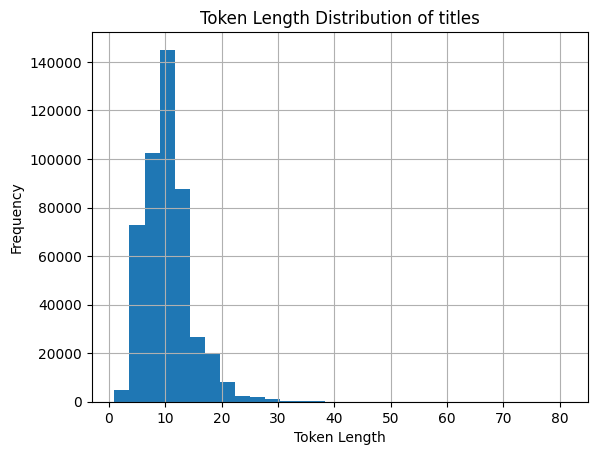

Summary statistics token length of titles: 
count    473282.000000
mean         10.206894
std           4.095293
min           1.000000
25%           7.000000
50%          10.000000
75%          12.000000
max          81.000000
Name: title_token_length, dtype: float64 



In [5]:
df.title_token_length.hist(bins=30)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution of titles')

plt.show()

print(f"Summary statistics token length of titles: \n{df.title_token_length.describe()} \n")

#### Tiltle+Description token length

Summary statistics token length of titles+descriptions: 
count    473282.000000
mean         50.167553
std          18.652764
min           4.000000
25%          40.000000
50%          49.000000
75%          58.000000
max        2175.000000
Name: article_token_length, dtype: float64 

Articles under 250 tokens: 0.9996767255040335
descriptions under 100 tokens: 0.986745745665375 



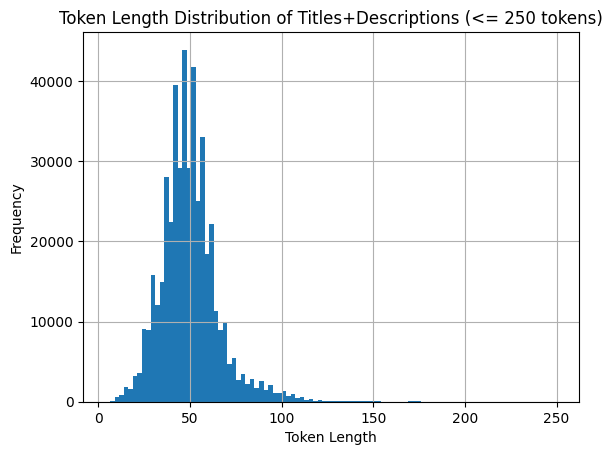

Summary statistics description token length <= 250: 
count    473129.000000
mean         50.046824
std          16.525092
min           4.000000
25%          40.000000
50%          49.000000
75%          58.000000
max         250.000000
Name: article_token_length, dtype: float64 



In [6]:
print(f"Summary statistics token length of titles+descriptions: \n{df.article_token_length.describe()} \n")

df_under_250 = df[df.article_token_length <= 250]
print(f"Articles under 250 tokens: {len(df_under_250)/len(df)}")
df_under_100 = df[df.article_token_length <= 100]
print(f"descriptions under 100 tokens: {len(df_under_100)/len(df)} \n")

df_under_250.article_token_length.hist(bins=100)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution of Titles+Descriptions (<= 250 tokens)')

plt.show()

print(f"Summary statistics description token length <= 250: \n{df_under_250.article_token_length.describe()} \n")

In [10]:
df_under_20 = df[df.article_token_length < 20]
print(f"Articles under 20 tokens: {len(df_under_20)/len(df)}")

Articles under 20 tokens: 0.012366834149619043


#### Categories

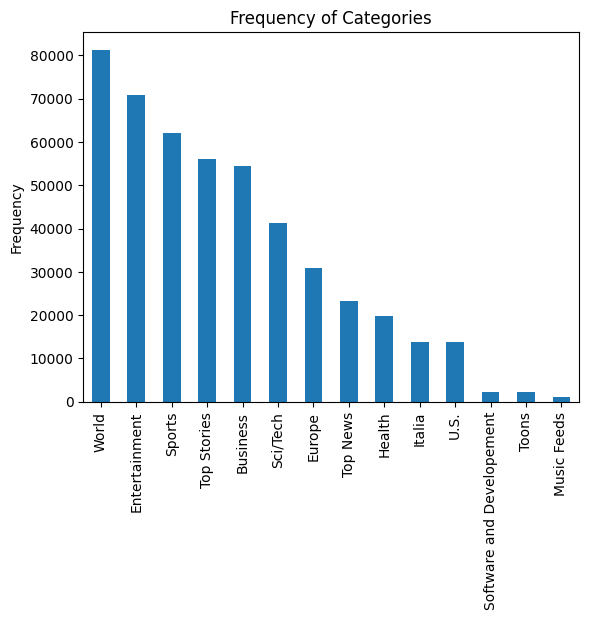

In [7]:
df.category.value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')
plt.show()

#### Conclusion
+ A lower bound for article token length of 20 would reduce the total data by 1.2% (too little amount of tokens = bad data)
+ Above 99% of the articles have a token length <= 250 (many models have a maximum sequence length of 250 or 500)
+ Therefor an article included in the training data should have a token length in between 20 and 250 tokens 
+ Minority classes "Software and Development", "Toons" and "Music Feeds" are not represented enough to be included in the training data